# Analysis of time series data

Temperature daily series for 10 years reported for several stations. The pipeline involves cleaning and preprocessing before trying a few time-series techniques.

In [161]:
import os
import pandas as pd
import numpy as np
os.listdir()

['.ipynb_checkpoints',
 'brush_up.py',
 'chile-variety-heat-levels.csv',
 'Cleaning temperature data.ipynb',
 'Cleaning temperature dataV2.ipynb',
 'matrix_operations.py',
 'matrix_operations.pyc',
 'numpy_ex',
 'prime_numbers.py',
 'statistics.py',
 'tmean.csv',
 'udacity_quesries.sql',
 'Untitled.ipynb',
 'vector_operations.py',
 'vector_operations.pyc']

In [160]:
data= pd.read_csv('tmean.csv')

In [162]:
min_max_dates= data.iloc[:,range(3, 4021)].columns.max(), data.iloc[:,range(3, 4021)].columns.min() 
print('Data starts and finish from {}'.format(min_max_dates))

Data starts and finish from ('9/9/14 0:00', '1/1/04 0:00')


In [165]:
## MAke data long format
data_long= pd.melt(data, id_vars= list(data.columns)[:3],
              value_vars= list(data.columns)[3:],
              var_name='Date',
              value_name='Mean temp')
data_long['Date'] = pd.to_datetime(data_long['Date'])
data_long.head(10)

,Station_Name,Longitude,Latitude,Date,Mean temp
0,228,-85.125142,42.903843,2004-01-01,-0.455
1,1375,-84.629681,42.527093,2004-01-01,-0.120
2,1382,-84.736609,42.542085,2004-01-01,-0.045
3,1426,-84.640901,42.277745,2004-01-01,0.175
4,1436,-84.869903,42.300634,2004-01-01,0.425
5,1438,-85.013604,42.301348,2004-01-01,0.465
6,1472,-83.860508,42.041220,2004-01-01,0.685
7,1504,-85.240813,42.169341,2004-01-01,0.545
8,1519,-84.632883,42.185511,2004-01-01,0.265
9,1606,-85.244093,41.772676,2004-01-01,0.700


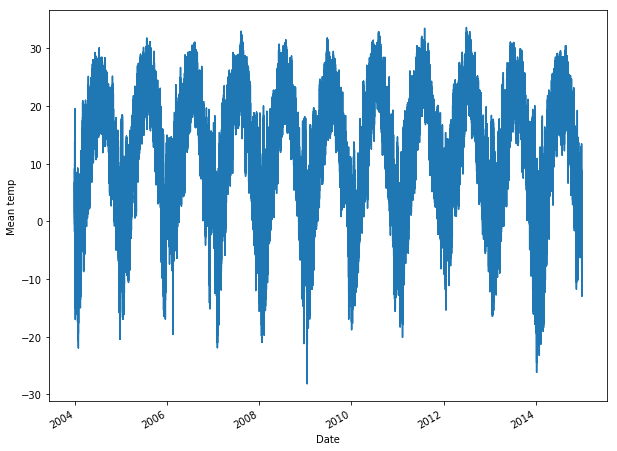

In [71]:
series= pd.Series(index=data_long.Date, data=data_long['Mean temp'].values)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
series.plot()
plt.xlabel('Date')
plt.ylabel('Mean temp')
plt.show()

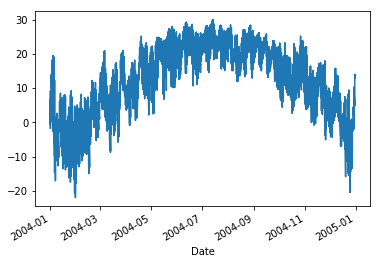

In [106]:
## Pick only one year to try some time series:
from pandas import DatetimeIndex

#Lets add in a year column for easy slicing:
data_long['year']= pd.DatetimeIndex(data_long.Date.values).year

# Filter obs for year 2004 only:
data_2004 = data_long[data_long['year'] == 2004]

pd.Series(data=data_2004['Mean temp'].values, index=data_2004.Date).plot()

In [155]:
#### Here we try forecasting daily temperatures:
from sklearn.metrics import mean_squared_error
from time import clock

# Series for 2004 only:
series_2004= pd.Series(data=data_2004['Mean temp'].values, index=data_2004.Date)

# A function to run a n-window moving average to smooth the series and forecast
def moving_avg(input_series, window):
    '''
    This function runs a 3-step moving average to smooth a series
    inputs: input_series (a time indexed series), 
            window (a integer to indicate the range for smoothing an entry)
    output= Accuracy measure, and a df with obs and predicted values
    '''
    # Prepare the memory process:
    history= [input_series[entry] for entry in range(window)]
    test= [input_series[entry] for entry in range(window, len(input_series))]
    predictions=[]
    
    # Implement the 3-window moving average:
    t0= clock()
    for step in range(len(test)):
        length= len(history)
        yhat= np.mean([history[period] for period in range(length-window, length)])
        obs= test[step]
        predictions.append(yhat)
        history.append(obs)
    error= mean_squared_error(test, predictions)
    print('running time for a {}-long series: {}'.format(len(test), clock()-t0))
    print('Test MSE: {:3f}'.format(error))
    
moving_avg(series_2004.values, window=3)

running time for a 51603-long series: 0.6115410497200173
Test MSE: 2.644379


In [159]:
data_2008 = data_long[data_long['year'] == 2008]
series_2008= pd.Series(data=data_2008['Mean temp'].values, index=data_2008.Date)
moving_avg(series_2008.values, window=3)

running time for a 51603-long series: 0.6243308408902521
Test MSE: 2.823440


In [ ]:
## Pre-code
# Prepare the memory process:
X= series_2004.values
window= 3
history= [X[i] for i in range(window)]
test= [X[i] for i in range(window, len(X))]
predictions=[]

# Implement the 3-window moving average:

for step in range(len(test)):
    length= len(history)
    yhat= np.mean([history[i] for i in range(length-window, length)])
    obs= test[step]
    predictions.append(yhat)
    history.append(obs)
error= mean_squared_error(test, predictions)
print('Test MSE: {:3f}'.format(error))    

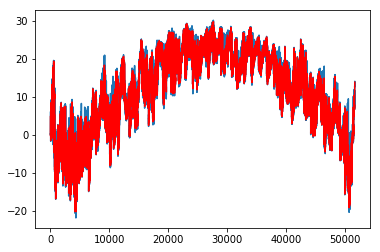

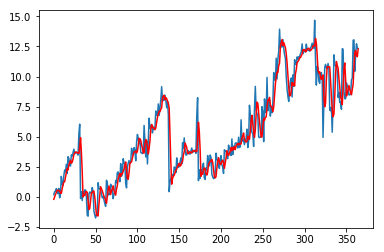

In [169]:
#PLots:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()
plt.plot(test[0:365])
plt.plot(predictions[0:365], color='red')
plt.show()

---
## A digression on the advantages of list comprehensions vs. for-loops

A simple example that shows how efficient list comprehensions can be to fill in lists resulting from large iterations.

In [152]:
import time
t0=time.clock()
test_list= [i for i in range(10000000)]
print('A list of {} elements took {} seconds'.format(len(test_list), time.clock()-t0))

A list of 10000000 elements took 0.9539891227876751 seconds


In [153]:
t0=time.clock()
test_list=[]
for i in range(10000000):
    test_list.append(i)
print('A list of {} elements took {} seconds'.format(len(test_list), time.clock()-t0))

A list of 10000000 elements took 2.152322248198402 seconds
